# Import Required Libraries and Load + Get Basic Information of The Data

## Import Required Libraries and Load Data

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [106]:
df = pd.read_csv('university_students_with_outliers.csv')

## Analyze and Get Basic Information of The Data

In [107]:
df.head()

,Age,Gender,Major,Hours on Social Media,Friends/Followers,Social Media Platform,Posting Frequency,Academic Performance
0,25,Female,Computer Science,7.2,336,Instagram,Rarely,Average
1,23,Male,NaN,7.1,945,Twitter,Rarely,Average
2,21,Male,Business,0.0,1411,Snapchat,Never,Good
3,25,Female,IT,7.7,1359,LinkedIn,Rarely,Poor
4,20,Female,NaN,7.1,924,Instagram,Rarely,Poor


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    219 non-null    int64  
 1   Gender                 208 non-null    object 
 2   Major                  197 non-null    object 
 3   Hours on Social Media  219 non-null    float64
 4   Friends/Followers      219 non-null    int64  
 5   Social Media Platform  215 non-null    object 
 6   Posting Frequency      210 non-null    object 
 7   Academic Performance   211 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 13.8+ KB


Missing Data Count: 
Age                       0
Gender                   11
Major                    22
Hours on Social Media     0
Friends/Followers         0
Social Media Platform     4
Posting Frequency         9
Academic Performance      8
dtype: int64


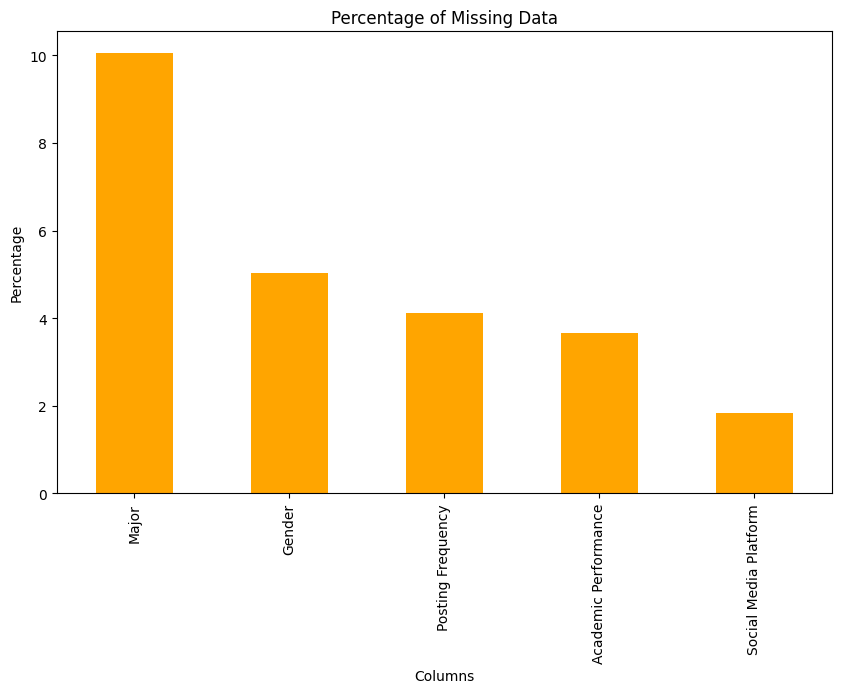

In [109]:
print("Missing Data Count: ")
print(df.isnull().sum())
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='orange')
plt.title("Percentage of Missing Data")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

It is seen that there are some missing datas present in the dataset which are of Major,Gender,Posting Frequency, Academic Performance and Social Media Platform columns. We will fill these missing values with the most frequent value in the column.

# Preprocessing

## Handle Missing Data

In [110]:
categorical_columns = ['Major','Gender','Social Media Platform']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
ordinal_columns = ['Posting Frequency', 'Academic Performance']
for col in ordinal_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

Missing datas are being filled up by imputed values.

In [111]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0
Number of duplicate rows: 0


There are no duplicate rows in the dataset.

In [112]:
df.dropna(inplace=True)
df.isnull().sum()

Age                      0
Gender                   0
Major                    0
Hours on Social Media    0
Friends/Followers        0
Social Media Platform    0
Posting Frequency        0
Academic Performance     0
dtype: int64

Final checking all null values are imputed.

In [113]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    219 non-null    int64  
 1   gender                 219 non-null    object 
 2   major                  219 non-null    object 
 3   hours_on_social_media  219 non-null    float64
 4   friends/followers      219 non-null    int64  
 5   social_media_platform  219 non-null    object 
 6   posting_frequency      219 non-null    object 
 7   academic_performance   219 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 13.8+ KB


the above code is written to convert names in smaller case letters and also join them using underscore.

## Handling outliers

In [87]:
# Create the box plot for hours_on_social_media
fig1 = px.box(df, y='hours_on_social_media', title='Boxplot of Hours on Social Media')
fig1.show()


In [88]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [89]:
fig2 = px.box(df, y='friends/followers', title='Boxplot of Friends/Followers')
fig2.show()
# Q1 = df['friends/followers'].quantile(0.25)
# Q3 = df['friends/followers'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = df[(df['friends/followers'] < lower_bound) | (df['friends/followers'] > upper_bound)]

# # Count the number of outliers
# num_outliers = outliers.shape[0]

# print(f"Number of outliers: {num_outliers}")
# print("Outliers:")
# print(outliers)


## Label Encoding

In [63]:
#df["social_media_platform"].value_counts()
df["academic_performance"].value_counts()

academic_performance
Average    105
Good        72
Poor        42
Name: count, dtype: int64

In [64]:
label_encoder = LabelEncoder()

# Encode ordinal column
# Map: Never (0), Rarely (1), Sometimes (2), Often (3), Daily (4)
posting_frequency_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Daily': 4}
df['posting_frequency'] = df['posting_frequency'].map(posting_frequency_mapping)
academic_performance_mapping = {'Good': 0, 'Average': 1, 'Poor': 2}
df['academic_performance'] = df['academic_performance'].map(academic_performance_mapping)
gender_mapping = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].map(gender_mapping)

print("\nDataset After Encoding:")
print(df.head())


Dataset After Encoding:
   age  gender             major  hours_on_social_media  friends/followers  \
0   25       1  Computer Science                    7.2                336   
1   23       0  Computer Science                    7.1                945   
2   21       0          Business                    0.0               1411   
3   25       1                IT                    7.7               1359   
4   20       1  Computer Science                    7.1                924   

  social_media_platform  posting_frequency  academic_performance  
0             Instagram                  1                     1  
1               Twitter                  1                     1  
2              Snapchat                  0                     0  
3              LinkedIn                  1                     2  
4             Instagram                  1                     2  


Values are mapped to numeric values according to the question given parameters.

## Univariate Analysis

In [114]:
fig = px.histogram(df, x='hours_on_social_media', nbins=10, title='Distribution of Hours Spent on Social Media')
fig.update_layout(xaxis_title='Hours', yaxis_title='Frequency',bargap=0.1)
fig.show()


Most of the people spend 0-8 hours on social media. among which highest amount of people spend 3-5 hours on social media. 2nd highest is 1-2.9 hours. and 3rd highest is 5-6.9 hours respectively. THere are very much less peoples who use excessive social media greater than or equal to 10 hours.

In [115]:
# Distribution of primary social media platforms
platform_counts = df['social_media_platform'].value_counts().reset_index()
platform_counts.columns = ['Social Media Platform', 'Count']

# Create a bar chart
fig = px.bar(platform_counts, 
              x='Social Media Platform', 
              y='Count', 
              title='Primary Social Media Platform Usage', 
              color='Count', 
              color_continuous_scale='viridis')

# Update layout
fig.update_layout(xaxis_title='Social Media Platform', 
                  yaxis_title='Count', 
                  xaxis_tickangle=-45)

# Show the plot
fig.show()


most of the people use Facebook(57 people) as their primary social media platform. followed by Instagram(37) and Linkedin(35). The least used social media platform is Twitter(26).

In [116]:
#Gender {'Male': 0, 'Female': 1}
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Create a pie chart
fig = px.pie(gender_counts, 
             names='Gender', 
             values='Count', 
             title='Gender Distribution',
             color='Gender', 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show the plot
fig.show()


Here Gender class is not equally distributed. The majority of the students are male with 58% and the minority are female with 42%.

In [117]:
#Performance {1:good ,2: average, 3:poor}
performance_counts = df['academic_performance'].value_counts().reset_index()
performance_counts.columns = ['Academic Performance', 'Count']

# Create a bar chart
fig = px.bar(performance_counts, 
              x='Academic Performance', 
              y='Count', 
              title='Distribution of Academic Performance', 
              color='Count', 
              color_continuous_scale='viridis')

# Update layout
fig.update_layout(xaxis_title='Academic Performance', 
                  yaxis_title='Count', 
                  xaxis_tickangle=-45)

# Show the plot
fig.show()


Most of the people have average academic performance with a count of 105 which is approximately 47.94% of the dataset. Least of them has poor academic performance with a count of 42 which is approximately 19.17% of the dataset. The good academic people are of 32.87% of the total people with a count of 72.

In [118]:
# Never (0), Rarely (1), Sometimes (2), Often (3), Daily (4)
fig = px.histogram(df, x='posting_frequency', nbins=5, 
                   title="Frequency of Social Media Posting",
                   color_discrete_sequence=['gold','green'])

# Update layout for better aesthetics
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(xaxis_title="Posting Frequency (Encoded)", 
                  yaxis_title="Count", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14),
                  bargap=0.1)

# Show the figure
fig.show()


Most of the people post rarely on socical media, with a count of 107 which is approximately 48.93% of the dataset. Least of them post daily on social media, with a count of 3 which is approximately 1.36% of the dataset. it is seen that people maximum post sometimes in social media and the persons with often and regular posts are less in number.

In [119]:
df['major'] = df['major'].replace({
    'CSE': 'CSE',
    'Computer Science': 'CSE',
    'Computer Science & Engineering': 'CSE',
    'IT': 'CSE'
})
major_counts = df['major'].value_counts().reset_index()
major_counts.columns = ['major', 'Count']

# Create a pie chart
fig = px.pie(major_counts, 
             names='major', 
             values='Count', 
             title='Major Distribution',
             color='major', 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show the plot
fig.show()


Most people of the dataset belong to cse major almost half of the total records and least of them belong to mechanical(9.13%). 

## Bivariate Analysis

In [120]:
#Academic Performance vs Hours on Social Media
fig = px.box(df, x='academic_performance', y='hours_on_social_media', 
              title="Hours on Social Media vs Academic Performance",
              color='academic_performance', 
              color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout for better aesthetics
fig.update_layout(xaxis_title="Academic Performance Levels", 
                  yaxis_title="Hours on Social Media", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14))

# Show the figure
fig.show()


This analysis is very very interesting. It shows that people who spend more time on social media have lower academic performance. This could be due to the fact that social media can be a distraction and can take up a lot of time, which can be used for studying and other important activities. It is important for students to balance their social media usage with their academic responsibilities. To be specific the people with good academic result has a median of 1.65 hours on social media and the people with average academic result has a median of 4 hours and the people with bad academic result has a median of 6 hours on social media. However there are some interesting observation is seen that there existis a few people with very good academic result who spend more than 7 hours on social media and there are also some people with bad academic result who spend less than 4 hours on social media. This shows that academic performance is not only determined by the amount of time spent on social media but also may depend on other factors such as study habits, time management skills and motivation etc.

In [121]:
#Academic Performance vs number of friends on social media
fig = px.box(df, x='academic_performance', y='friends/followers', 
              title="friends/followers vs Academic Performance",
              color='academic_performance', 
              color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout for better aesthetics
fig.update_layout(xaxis_title="Academic Performance Levels", 
                  yaxis_title="friends/followers", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14))

# Show the figure
fig.show()


all classes have somewhat equal means in case of number of friends or followers in social media and it is not a good indicatior of the academic performance.

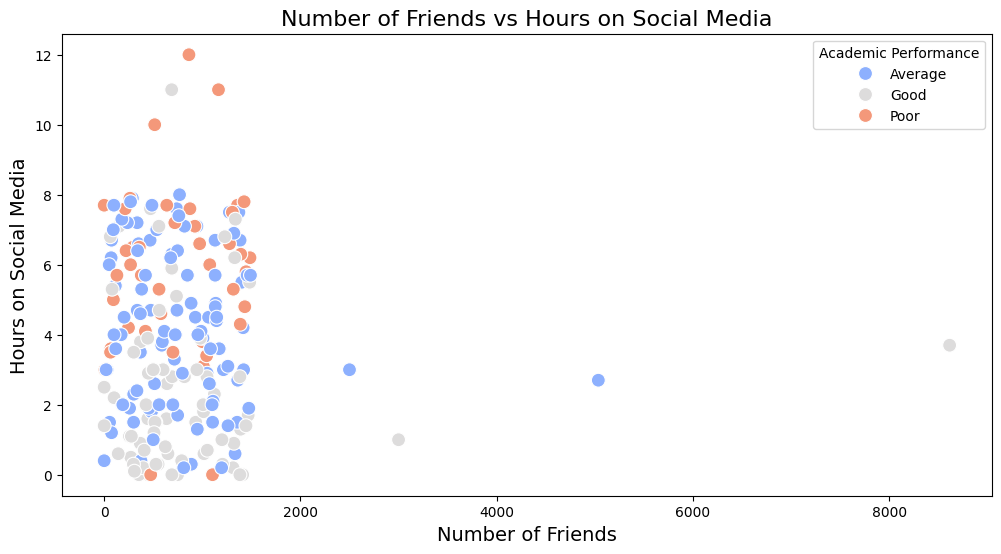

In [122]:
# Scatter Plot: Number of Friends vs Hours on Social Media
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='friends/followers', y='hours_on_social_media', hue='academic_performance', palette='coolwarm', s=100)
plt.title("Number of Friends vs Hours on Social Media", fontsize=16)
plt.xlabel("Number of Friends", fontsize=14)
plt.ylabel("Hours on Social Media", fontsize=14)
plt.legend(title='Academic Performance', loc='upper right')
plt.show()


This analysis is pretty confusing as the relationship of Number of Friends vs Hours on Social Media hued with academic performance is not clear. It is hard to tell whether the number of friends is a good or bad indicator of academic performance based on this plot. because most of the persons have number of friends between 0 to 1500 and hours on social media between 0 to 10. Another think to note is number of friend may be high but hours of social media can be low also the vice versa can exist. also it is seen that people can have many friends on social media platform but also do good academic result(noticed in some outliers).

In [123]:
# Create a grouped bar chart to visualize academic performance by gender
fig = px.histogram(df, x='gender', color='academic_performance', 
                   title="Academic Performance by Gender",
                   color_discrete_sequence=["green","blue","red"],
                   category_orders={'gender': df['gender'].value_counts().index.tolist()})

# Update layout for better aesthetics
fig.update_layout(xaxis_title="Gender", 
                  yaxis_title="Count", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=12),
                  yaxis_title_font=dict(size=12),
                  legend_title_text="Academic Performance",
                  legend_title_font=dict(size=12),
                  legend_font=dict(size=10),
                  bargap=0.2)

# Show the figure
fig.show()


As male is more then female in this dataset i will measure the academic performance in percentage for both of them to analyze the scenario. approx 16% of the male have poor academic performance and 30% of the male have good academic performance. But 53% of the male has average academic performance. For female approx 22.5% have poor academic performance and approx 35.5% have good academic performance. But 41% of the female has average academic performance. so it can be infered that most of the male has tendency to do average result but the worst and best result percentage is more in case of female.

In [124]:
# 'gender' vs 'hours_on_social_media' 
fig = px.box(df, x='gender', y='hours_on_social_media', 
              title="Gender vs Hours on Social Media",
              color='gender', 
              color_discrete_sequence=["green"])

# Update layout for better aesthetics
fig.update_layout(xaxis_title="Gender", 
                  yaxis_title="Hours on Social Media", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14))

# Show the figure
fig.show()


There is no significant difference between the hours spent on social media by male and female students. Both genders spend approximately the same amount of time on social media. But to state specifially the female students(3.75 hours) spend more time on social media than the male students(3.6 hours).

In [125]:
# Major vs Hours on Social Media plot
fig = px.box(df, x="major", y="hours_on_social_media", 
             title="Hours Spent on Social Media by Major",
             labels={"major": "Major", "hours_on_social_media": "Hours on Social Media"},
             color="major", 
             boxmode="group")
fig.update_layout(
    xaxis_title="Major",
    yaxis_title="Hours on Social Media",
    template="plotly_white"
)
fig.show()

It is seen that Mechanical majors speand the most time on social media which is 5.6 hours in average. people who are fro bbusiness major spend 2.45 hours on social media in average. The majority class i.e. cse majors spend 3.9 hours in social media in average.

In [126]:
# Major vs Academic Performance plot
fig = px.bar(df, x="major", color="academic_performance", 
             title="Academic Performance by Major",
             labels={"major": "Major", "academic_performance": "Academic Performance"},
             category_orders={"academic_performance": ["Poor", "Average", "Good"]})
fig.update_layout(
    xaxis_title="Major",
    yaxis_title="Count of Students",
    template="plotly_white"
)
fig.show()


Significant amount of the cse majors have average academic performance. On the other hand in case of business and biology majors the amound of good academic performance is slightly higher than thee average category.

In [127]:
# def normalize_and_encode_data(df, label_columns, onehot_columns, numerical_columns):
#     encoded_df = df.copy()

#     scaler = StandardScaler()
#     encoded_df[numerical_columns] = scaler.fit_transform(encoded_df[numerical_columns])

#     # Step 2: Label Encoding for ordinal columns
#     label_encoder = LabelEncoder()
#     for col in label_columns:
#         encoded_df[col] = label_encoder.fit_transform(encoded_df[col])
#     #encoded_df['posting_frequency'] =scaler.fit_transform(encoded_df['posting_frequency'])

#     # Step 3: One-Hot Encoding for nominal columns using OneHotEncoder
#     ohe = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
#     encoded_ohe = ohe.fit_transform(encoded_df[onehot_columns])

#     # Get column names for One-Hot Encoded features
#     ohe_columns = ohe.get_feature_names_out(onehot_columns)

#     # Step 4: Create a DataFrame for One-Hot Encoded columns and concatenate
#     ohe_df = pd.DataFrame(encoded_ohe, columns=ohe_columns, index=encoded_df.index)
    
#     # Drop the original nominal columns
#     encoded_df = encoded_df.drop(columns=onehot_columns)

#     # Concatenate the one-hot encoded DataFrame
#     encoded_df = pd.concat([encoded_df, ohe_df], axis=1)

#     return encoded_df


# numerical_columns = ['age', 'hours_on_social_media', 'friends/followers']
# # List of columns for Label Encoding (Ordinal columns)
# label_columns = ['frequency_of_posting', 'academic_performance']
# # List of columns for One-Hot Encoding (Nominal columns)
# onehot_columns = ['gender', 'major', 'primary_social_media_platform']


# numerical_columns = ['age', 'hours_on_social_media', 'friends/followers']
# label_columns = ['posting_frequency', 'academic_performance']
# onehot_columns = ['gender', 'major', 'social_media_platform']

# # Call the function
# encoded_df = normalize_and_encode_data(df, label_columns, onehot_columns, numerical_columns)

# # Show the first few rows of the encoded and normalized DataFrame
# encoded_df.head()
posting_frequency_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Daily': 4}
df['posting_frequency'] = df['posting_frequency'].map(posting_frequency_mapping)
academic_performance_mapping = {'Good': 2, 'Average': 1, 'Poor': 0}
df['academic_performance'] = df['academic_performance'].map(academic_performance_mapping)
gender_mapping = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].map(gender_mapping)
onehot_columns = ['social_media_platform']
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_ohe = ohe.fit_transform(df[onehot_columns])
ohe_columns = ohe.get_feature_names_out(onehot_columns)
ohe_df = pd.DataFrame(encoded_ohe, columns=ohe_columns, index=df.index)
df = df.drop(columns=onehot_columns)
df = pd.concat([df, ohe_df], axis=1)
scaler = StandardScaler()
df[["friends/followers"]] = scaler.fit_transform(df[["friends/followers"]])

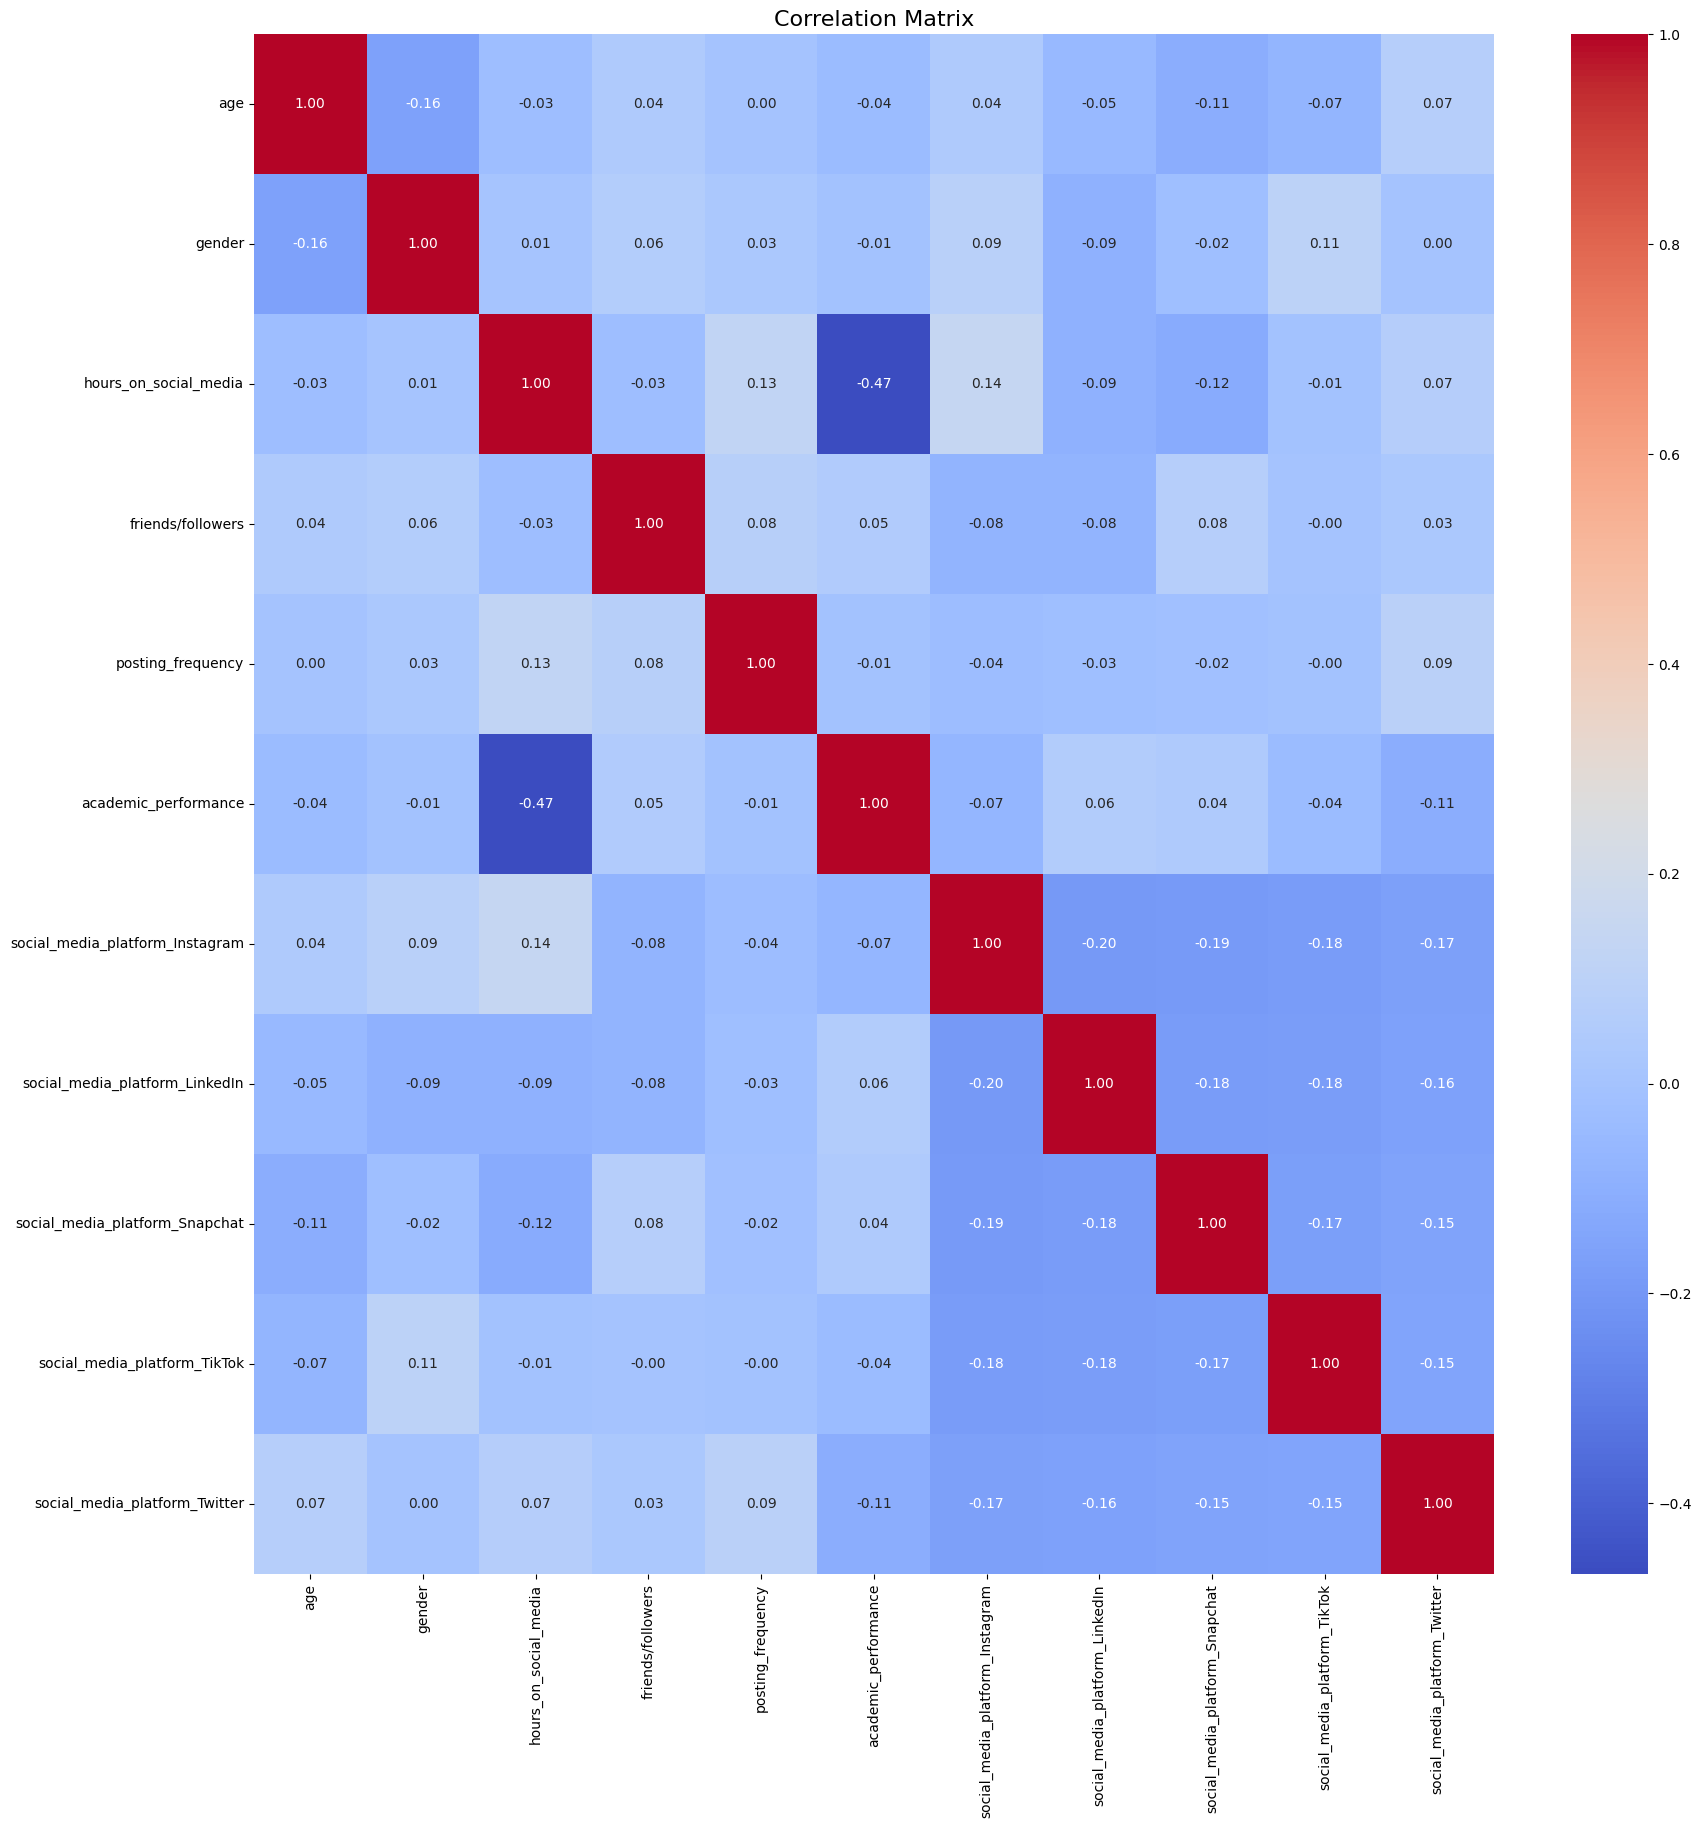

In [128]:
# Correlation Analysis of Numerical Variables
plt.figure(figsize=(20, 20))
numeric_df=df.drop("major",axis=1)
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()


- Strong Correlation: Hours spent on social media has a strong positive correlation with academic performance (0.47). This suggests that students who spend less time on social media tend to perform better academically. Here it is just seen positive for categorical mapping style ie. 0:good, 1:average and 2:poor.

- Weak Negative Correlation: There is a weak negative correlation between age and gender ( -0.16), suggesting a slightly inverse relationship. also with social_media_platform and age -0.15 is observed.
- Minimal Correlation: Most of the other relationships have a correlation value close to zero. This indicates that these variables are not strongly related to each other, or that the relationship is too complex to be captured by simple linear correlation.



## Multivariate Analysis

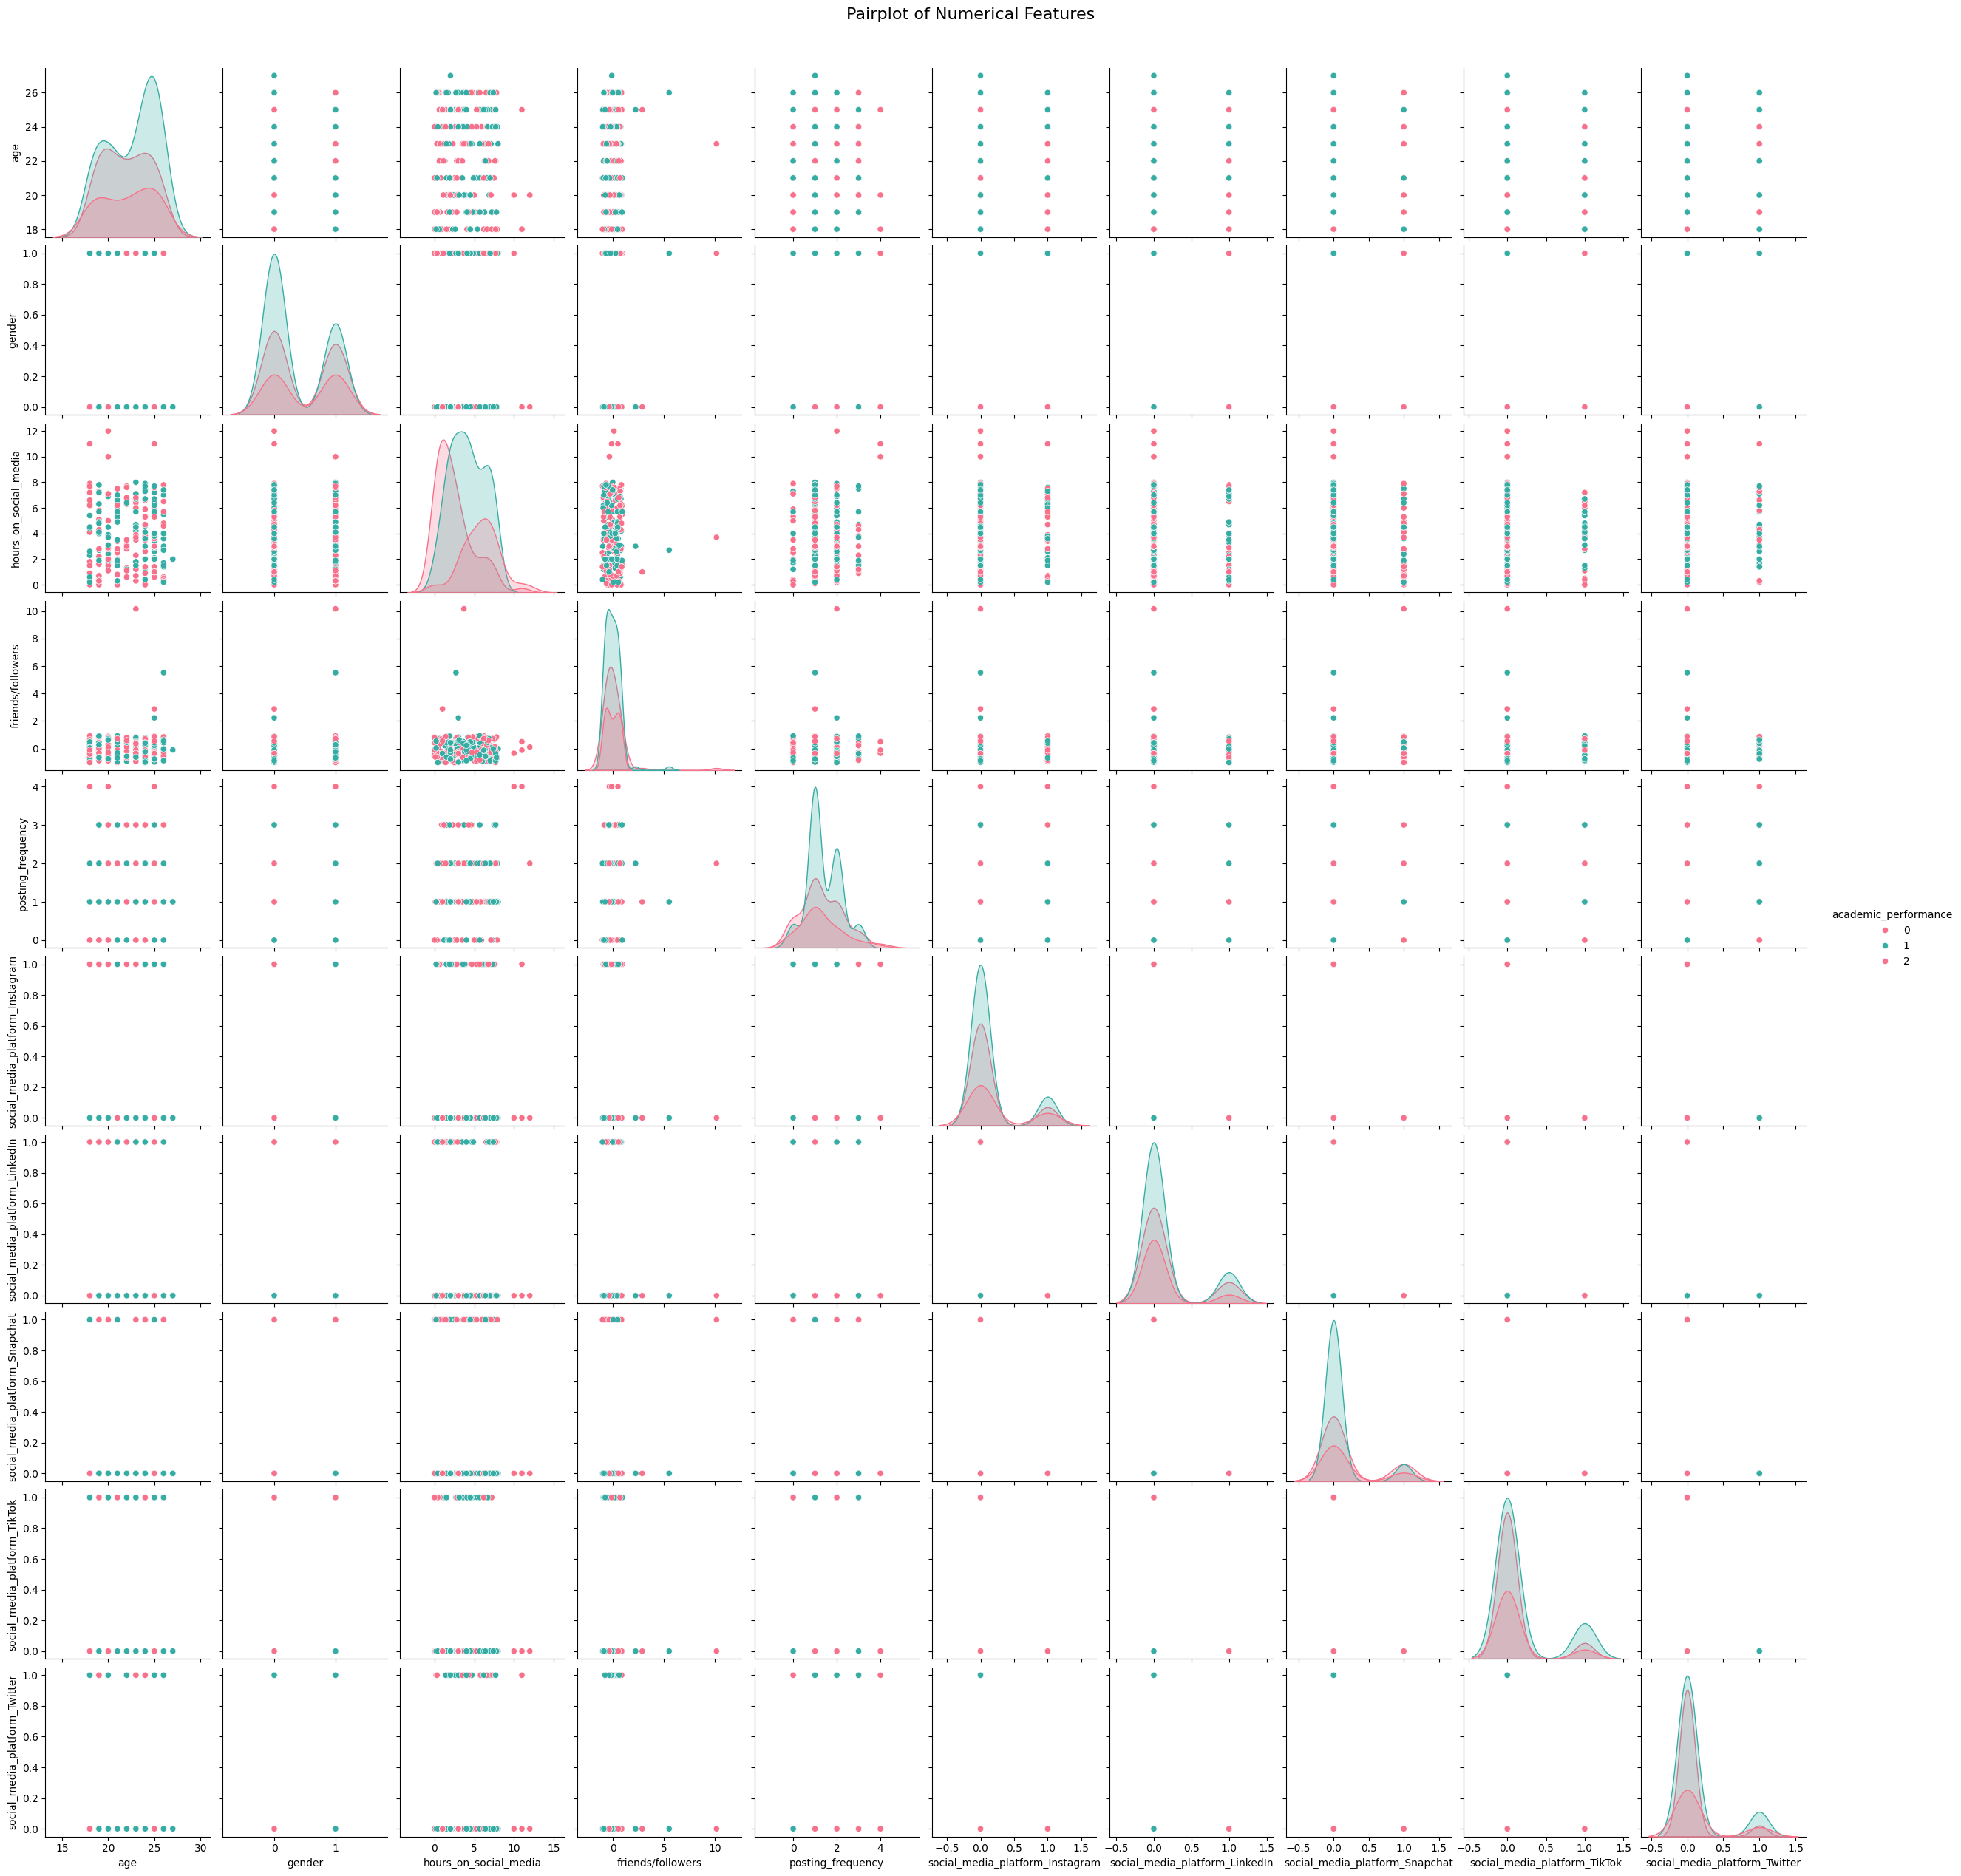

In [129]:
# Pairplot Analysis
sns.pairplot(df, hue='academic_performance', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()
